In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Data.csv')

In [3]:
# These countries are deleted as they are unncessary for clustering
data = data[~data['Country Name'].isin(['North America', 'High income', 'Sierra Leone', 'Liberia', 'Nauru', 'Kiribati',
                                        'Burundi','Moldova','Ireland'])]

In [4]:
df = data.copy()

In [5]:
df.shape

(159, 26)

In [6]:
df.sample(10, random_state = 1)

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,target,Unnamed: 25
34,El Salvador,SLV,7.843,7.886,7.886,7.772,8.130,9.201,8.693,8.478,...,8.599,8.758,8.715,8.423,8.323,8.808,9.082,9.716,3,NaN
47,Greece,GRC,7.243,7.988,8.234,8.449,8.094,8.565,8.259,8.398,...,7.891,8.220,8.449,8.135,8.120,8.198,9.504,9.173,3,NaN
19,Belgium,BEL,7.999,8.150,8.318,9.164,9.328,9.224,9.130,9.136,...,10.609,10.797,10.794,10.799,10.861,10.795,11.198,11.043,1,NaN
100,Comoros,COM,7.515,6.653,6.681,6.654,6.580,6.125,5.771,5.418,...,5.238,4.601,4.653,5.268,4.903,5.180,5.865,6.335,6,NaN
89,Cabo Verde,CPV,4.434,4.752,4.756,4.500,4.377,4.274,4.490,4.189,...,5.327,4.823,4.846,5.268,4.738,4.563,6.124,6.904,6,NaN
24,Australia,AUS,7.594,7.678,7.876,7.881,8.087,7.970,7.977,8.055,...,9.834,10.182,10.093,10.123,10.060,10.220,10.684,10.544,2,NaN
50,Mozambique,MOZ,2.188,2.879,3.277,3.395,3.672,4.375,4.089,3.931,...,6.333,6.717,7.281,7.838,8.089,7.953,7.570,9.052,3,NaN
16,Netherlands,NLD,7.710,8.060,8.650,9.060,9.110,9.100,9.080,9.050,...,10.570,10.320,10.060,10.110,10.020,10.140,11.210,11.290,1,NaN
45,Chile,CHL,7.000,7.097,7.208,7.250,6.910,6.624,6.072,6.213,...,7.842,8.351,8.558,9.091,9.226,9.363,9.727,9.343,3,NaN
106,Saudi Arabia,SAU,4.212,4.462,4.249,3.979,3.584,3.419,3.619,3.562,...,5.158,5.862,6.241,6.031,5.341,5.467,6.646,5.968,7,22.000


In [7]:
df.drop('Unnamed: 25', axis = 1, inplace = True)

In [8]:
df1 = df.iloc[:, 5:24]

In [9]:
df2 = data.copy()
hc_subset_df = data.iloc[:, 5:24]

In [10]:
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_subset_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_subset_df))
        print(
            f"Cophenetic correlation for {dm} distance and {lm} linkage is {c}."
        )

Cophenetic correlation for euclidean distance and single linkage is 0.528865635084314.
Cophenetic correlation for euclidean distance and complete linkage is 0.7157167763727673.
Cophenetic correlation for euclidean distance and average linkage is 0.8017329368065795.
Cophenetic correlation for euclidean distance and weighted linkage is 0.6745024849078474.
Cophenetic correlation for chebyshev distance and single linkage is 0.4604390709111463.
Cophenetic correlation for chebyshev distance and complete linkage is 0.6390819962296095.
Cophenetic correlation for chebyshev distance and average linkage is 0.7776457457897049.
Cophenetic correlation for chebyshev distance and weighted linkage is 0.6487876993771314.
Cophenetic correlation for mahalanobis distance and single linkage is 0.02537035108909658.
Cophenetic correlation for mahalanobis distance and complete linkage is 0.06432309088896893.
Cophenetic correlation for mahalanobis distance and average linkage is 0.077287722911159.
Cophenetic co

* Although the highest cophenetic correlation is a combination of euclidean distance and averag linkage, I used cityblock distance and average as it seems to have better result.

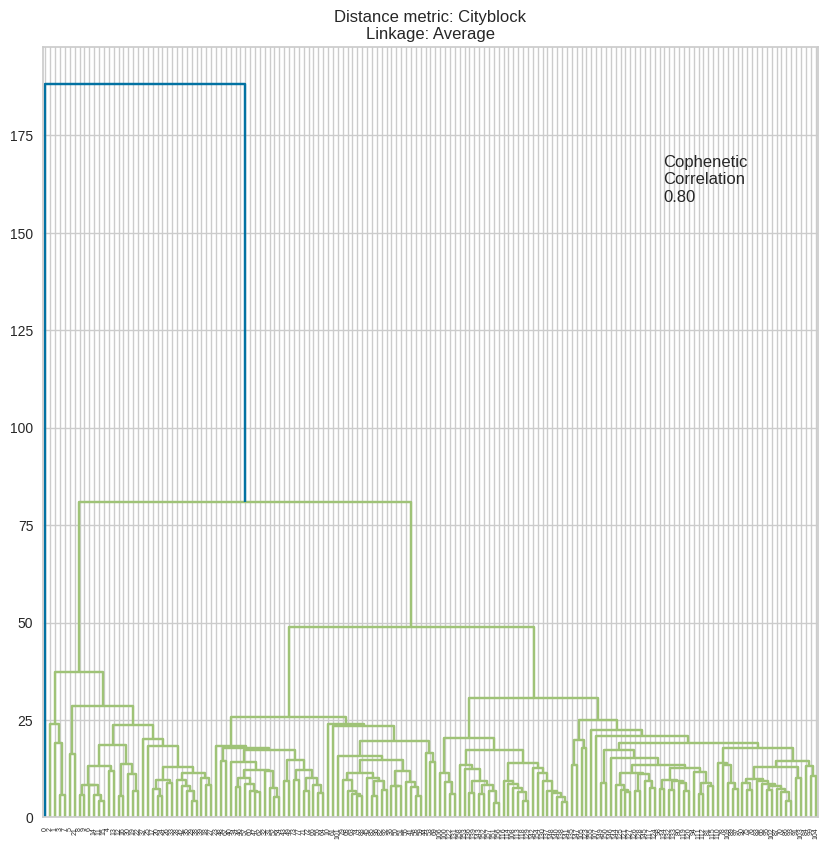

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

distance_metric = "cityblock"
linkage_method = "average"

Z = linkage(hc_subset_df, metric = distance_metric, method = linkage_method)
coph_corr, coph_dist = cophenet(Z, pdist(hc_subset_df))

fig, ax = plt.subplots(figsize=(10, 10))
dendrogram(Z, ax=ax)
ax.set_title(f"Distance metric: {distance_metric.capitalize()}\nLinkage: {linkage_method.capitalize()}")

ax.annotate(
    f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
    (0.80, 0.80),
    xycoords="axes fraction",
)

plt.show()

In [27]:
HCmodel = AgglomerativeClustering(metric = 'cityblock', linkage = 'average', n_clusters = 6)
HCmodel.fit(hc_subset_df)

AgglomerativeClustering(linkage='average', metric='cityblock', n_clusters=6)

In [28]:
hc_subset_df["HC_Clusters"] = HCmodel.labels_
df2["HC_Clusters"] = HCmodel.labels_

In [29]:
hc_cluster_profile = hc_subset_df.groupby("HC_Clusters").mean()

In [30]:
hc_cluster_profile

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
HC_Clusters,,,,,,,,,,,,,,,,,,,
0,8.316,8.349,8.440,8.421,8.440,8.775,9.284,9.184,9.296,9.412,9.471,9.445,9.575,9.595,9.533,9.474,9.711,10.518,10.506
1,6.056,6.121,6.160,6.138,6.147,6.402,6.833,6.810,6.797,6.849,6.898,6.949,7.004,7.090,7.005,7.036,7.113,7.828,8.103
2,4.520,4.604,4.618,4.690,4.570,4.556,4.782,4.793,4.719,4.705,4.787,4.765,4.878,4.927,4.933,4.862,4.964,5.392,5.399
3,14.506,14.551,14.579,14.709,14.918,15.207,16.201,16.197,16.140,16.120,15.992,16.199,16.491,16.802,16.768,16.630,16.666,18.756,17.363
4,9.138,9.265,9.644,9.600,10.285,10.367,11.281,11.157,11.035,10.737,11.201,11.707,11.698,11.640,11.672,11.641,11.823,12.913,13.853
5,3.345,3.306,3.097,3.022,2.985,2.913,3.231,2.990,2.935,2.995,3.118,3.274,3.615,3.626,3.434,3.416,3.506,4.096,4.066


In [31]:
hc_df = hc_cluster_profile.copy()

In [32]:
for cl in df2["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df2[df2["HC_Clusters"] == cl]["Country Name"].unique())
    print()

In cluster 3, the following countries are present:
['United States']

In cluster 4, the following countries are present:
['Palau' 'Cuba' 'Germany' 'France']

In cluster 0, the following countries are present:
['United Kingdom' 'Armenia' 'Canada' 'Austria' 'Switzerland' 'Netherlands'
 'Sweden' 'Portugal' 'Belgium' 'Denmark' 'Japan' 'Spain' 'Malta'
 'Australia' 'Finland' 'Lesotho' 'Norway' 'New Zealand' 'Maldives'
 'Serbia' 'Brazil' 'Iceland' 'El Salvador' 'Argentina'
 'Bosnia and Herzegovina' 'Slovenia' 'Namibia' 'Italy' 'Uruguay' 'Greece']

In cluster 1, the following countries are present:
['Timor-Leste' 'Lebanon' 'Nicaragua' 'Panama' 'Czechia' 'Cyprus' 'Chile'
 'Korea, Rep.' 'Honduras' 'Mozambique' 'Latvia' 'Colombia' 'Bulgaria'
 'North Macedonia' 'Georgia' 'Andorra' 'Ecuador' 'South Africa'
 'Guinea-Bissau' 'Latin America & Caribbean (excluding high income)'
 'Bolivia' 'Croatia' 'Barbados' 'Paraguay' 'Tajikistan' 'Ukraine'
 'San Marino' 'Israel' 'Lithuania' 'Slovak Republic' 'Costa 

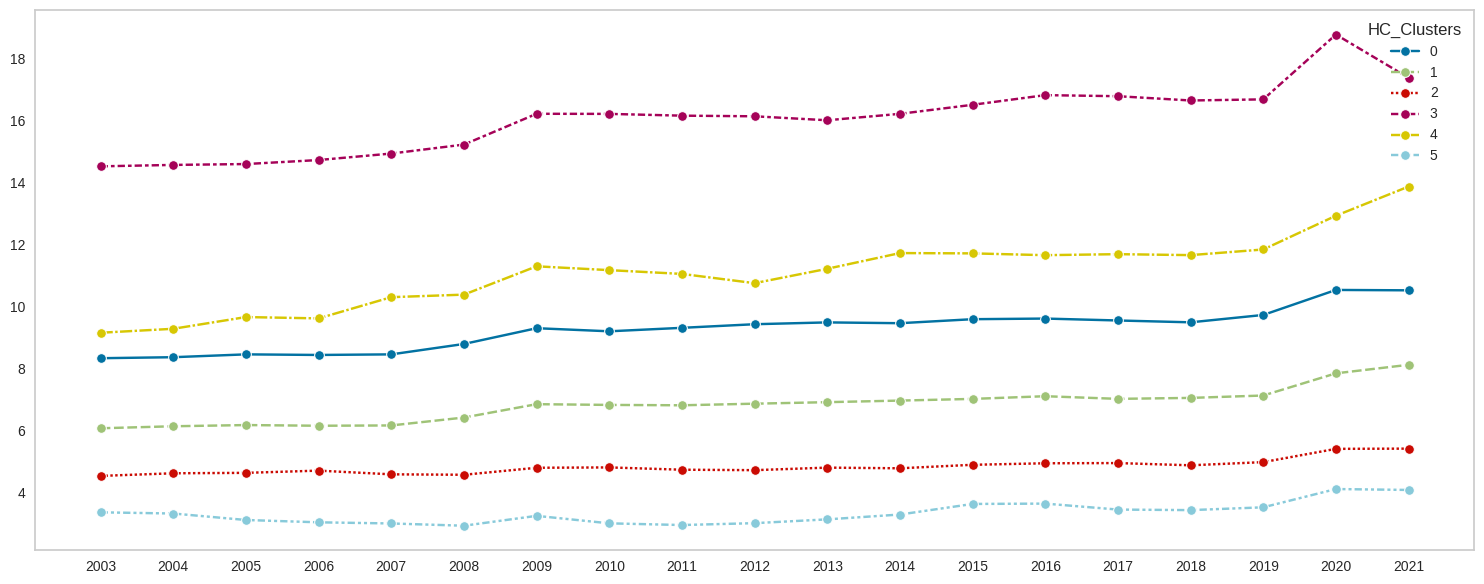

In [18]:
plt.figure(figsize = (15, 6))
sns.lineplot(hc_df.T, markers = 'o')
plt.grid(False)
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()

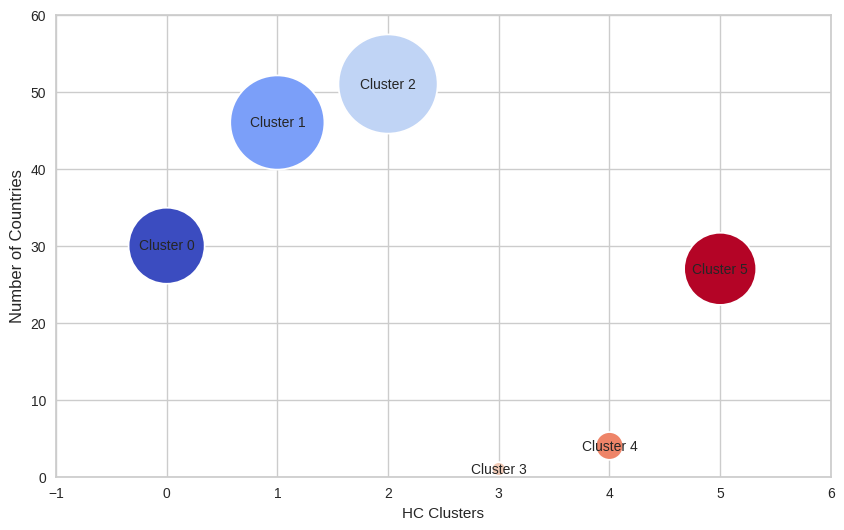

In [83]:
cluster_counts = df2.groupby("HC_Clusters")["Country Name"].nunique()

plt.figure(figsize=(10, 6))

sns.scatterplot(x = cluster_counts.index, y = cluster_counts.values, s = cluster_counts.values * 100,
                hue = cluster_counts.index, palette = 'coolwarm', legend = None)


for i, cluster in enumerate(cluster_counts.index):
    plt.text(cluster_counts.index[i], cluster_counts.values[i],
             f'Cluster {cluster}', ha = 'center', va = 'center', fontsize = 10)


plt.xlabel('HC Clusters')
plt.xlim(-1, 6)
plt.ylim(0, 60)
plt.ylabel("Number of Countries", fontsize=12)

plt.show()

--------------------------------------------------
--------------------------------------------------
--------------------------------------------------

In [19]:
# svm
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import LinearSVC

df_svm = df.copy()


# Extract features (X) and target (y)
X = df_svm[['2020', '2021']].values
y = df_svm['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#a) Train the Linear SVM model
svm_model_linear = SVC(kernel='linear' ,C = 1, random_state=42)
svm_model_linear.fit(X_train, y_train)
y_pred_linear = svm_model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("svc model Accuracy:", accuracy_linear)

#b) LinearSVC
LinearSVC = LinearSVC(C=1, random_state=42)
LinearSVC.fit(X_train, y_train)
y_pred_linear = LinearSVC.predict(X_test)
accuracy_LinearSVC = accuracy_score(y_test, y_pred_linear)
print("LinearSVC Accuracy:", accuracy_LinearSVC)



# c) Train the nonlinear SVM model (using sigmoid kernel)
svm_sigmoid = SVC(kernel='sigmoid', random_state=42)
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print("Nonlinear (Sigmoid) SVM Accuracy:", accuracy_sigmoid)


# d) Train the polynomial SVM model
svm_poly = SVC(kernel='poly', degree=3, random_state=42)  # Degree can be adjusted as needed
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial SVM Accuracy:", accuracy_poly)

# e) Train the Gaussian RBF kernel SVM model
svm_rbf = SVC(kernel='rbf', gamma=0.7, C=1, random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Gaussian RBF SVM Accuracy:", accuracy_rbf)

svc model Accuracy: 0.40625
LinearSVC Accuracy: 0.25
Nonlinear (Sigmoid) SVM Accuracy: 0.1875
Polynomial SVM Accuracy: 0.4375
Gaussian RBF SVM Accuracy: 0.3984375


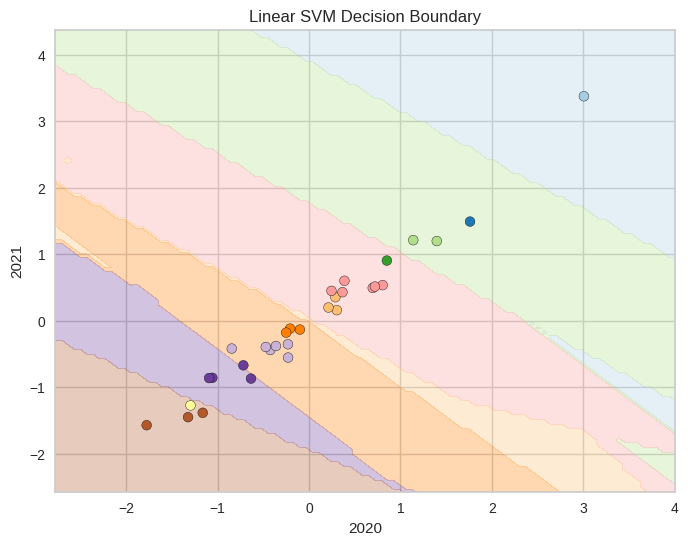

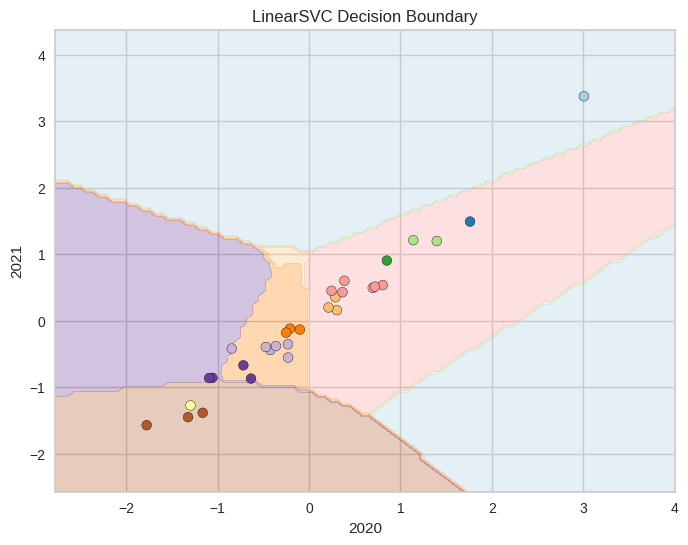

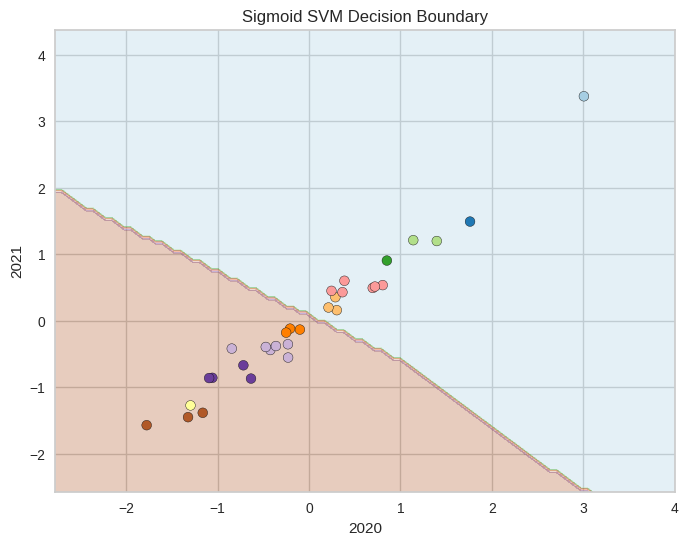

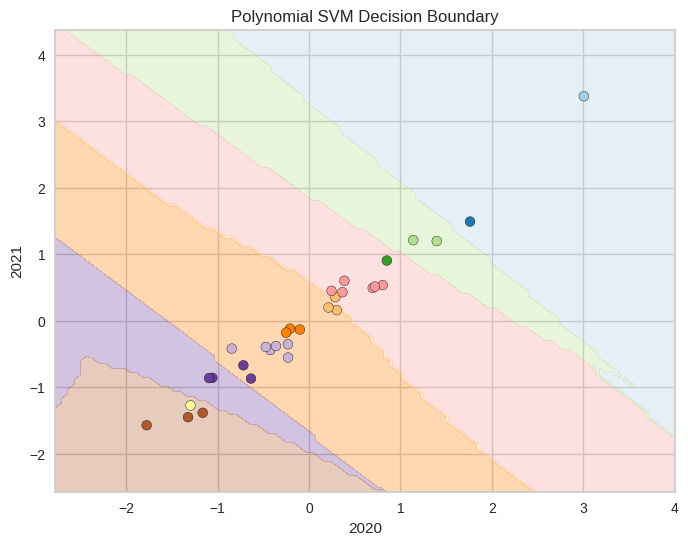

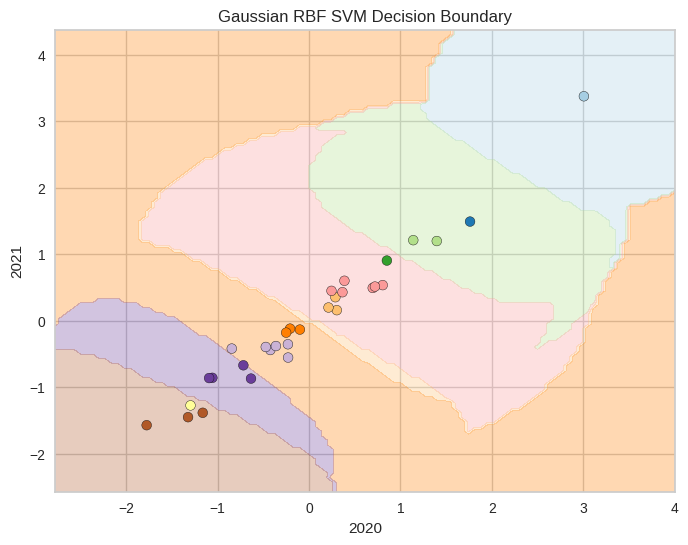

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('2020')
    plt.ylabel('2021')
    plt.title(title)
    plt.show()

# Plot decision boundaries for each SVM model
plot_decision_boundary(X_train, y_train, svm_model_linear, 'Linear SVM Decision Boundary')
plot_decision_boundary(X_train, y_train, LinearSVC, 'LinearSVC Decision Boundary')
plot_decision_boundary(X_train, y_train, svm_sigmoid, 'Sigmoid SVM Decision Boundary')
plot_decision_boundary(X_train, y_train, svm_poly, 'Polynomial SVM Decision Boundary')
plot_decision_boundary(X_train, y_train, svm_rbf, 'Gaussian RBF SVM Decision Boundary')
